In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
ab_test = pd.read_csv('datos/ab_data.csv')

In [3]:
ab_test['timestamp'] = pd.to_datetime(ab_test['timestamp'])

In [4]:
ab_test.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [5]:
def exploracion_dataframe(dataframe, columna_control):
    """
    Realiza un análisis exploratorio básico de un DataFrame, mostrando información sobre duplicados,
    valores nulos, tipos de datos, valores únicos para columnas categóricas y estadísticas descriptivas
    para columnas categóricas y numéricas, agrupadas por la columna de control.

    Params:
    - dataframe (DataFrame): El DataFrame que se va a explorar.
    - columna_control (str): El nombre de la columna que se utilizará como control para dividir el DataFrame.

    Returns: 
    No devuelve nada directamente, pero imprime en la consola la información exploratoria.
    """
    print(f"El número de datos es {dataframe.shape[0]} y el de columnas es {dataframe.shape[1]}")
    print("\n ..................... \n")

    print(f"Los duplicados que tenemos en el conjunto de datos son: {dataframe.duplicated().sum()}")
    print("\n ..................... \n")
    
    
    # generamos un DataFrame para los valores nulos
    print("Los nulos que tenemos en el conjunto de datos son:")
    df_nulos = pd.DataFrame(dataframe.isnull().sum() / dataframe.shape[0] * 100, columns = ["%_nulos"])
    display(df_nulos[df_nulos["%_nulos"] > 0])
    
    print("\n ..................... \n")
    print(f"Los tipos de las columnas son:")
    display(pd.DataFrame(dataframe.dtypes, columns = ["tipo_dato"]))
    
    
    print("\n ..................... \n")
    print("Los valores que tenemos para las columnas categóricas son: ")
    dataframe_categoricas = dataframe.select_dtypes(include = "O")
    
    for col in dataframe_categoricas.columns:
        print(f"La columna {col.upper()} tiene las siguientes valore únicos:")
        display(pd.DataFrame(dataframe[col].value_counts()).head())    
    
    # como estamos en un problema de A/B testing y lo que realmente nos importa es comparar entre el grupo de control y el de test, los principales estadísticos los vamos a sacar de cada una de las categorías
    
    for categoria in dataframe[columna_control].unique():
        dataframe_filtrado = dataframe[dataframe[columna_control] == categoria]
    
        print("\n ..................... \n")
        print(f"Los principales estadísticos de las columnas categóricas para el {categoria.upper()} son: ")
        display(dataframe_filtrado.describe(include = "O").T)
        
        print("\n ..................... \n")
        print(f"Los principales estadísticos de las columnas numéricas para el {categoria.upper()} son: ")
        display(dataframe_filtrado.describe().T)


In [6]:
exploracion_dataframe(ab_test, 'group')

El número de datos es 294478 y el de columnas es 5

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
user_id,int64
timestamp,datetime64[ns]
group,object
landing_page,object
converted,int64



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna GROUP tiene las siguientes valore únicos:


,count
group,
treatment,147276
control,147202


La columna LANDING_PAGE tiene las siguientes valore únicos:


,count
landing_page,
old_page,147239
new_page,147239



 ..................... 

Los principales estadísticos de las columnas categóricas para el CONTROL son: 


,count,unique,top,freq
group,147202,1,control,147202
landing_page,147202,2,old_page,145274



 ..................... 

Los principales estadísticos de las columnas numéricas para el CONTROL son: 


,count,mean,min,25%,50%,75%,max,std
user_id,147202.0,788123.098035,630002.0,709287.0,788053.5,867155.5,945998.0,91278.896888
timestamp,147202,2017-01-13 13:56:21.429967360,2017-01-02 13:42:15.234051,2017-01-08 02:33:34.643735296,2017-01-13 13:51:17.409371648,2017-01-19 01:59:53.926178560,2017-01-24 13:41:54.460509,NaN
converted,147202.0,0.120399,0.0,0.0,0.0,0.0,1.0,0.325429



 ..................... 

Los principales estadísticos de las columnas categóricas para el TREATMENT son: 


,count,unique,top,freq
group,147276,1,treatment,147276
landing_page,147276,2,new_page,145311



 ..................... 

Los principales estadísticos de las columnas numéricas para el TREATMENT son: 


,count,mean,min,25%,50%,75%,max,std
user_id,147276.0,787825.226283,630000.0,708729.5,787837.5,866693.75,945999.0,91142.800641
timestamp,147276,2017-01-13 13:24:00.006324480,2017-01-02 13:42:05.378582,2017-01-08 01:42:07.451820288,2017-01-13 12:48:04.842517504,2017-01-19 01:29:07.637558528,2017-01-24 13:41:44.097174,NaN
converted,147276.0,0.11892,0.0,0.0,0.0,0.0,1.0,0.323695


In [7]:
ab_test.head(2)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0


In [24]:
df_tasa = ab_test.groupby('group')['converted'].mean()

In [25]:
df_tasa # en este caso, hacemos z score (partimos de 0 y 1)

group
control      0.120399
treatment    0.118920
Name: converted, dtype: float64

In [27]:
from statsmodels.stats.proportion import proportions_ztest
df_test = ab_test[ab_test['group']== 'treatment']
df_control = ab_test[ab_test['group'] == 'control']
tamaño_muestral = [df_control.shape[0], df_test.shape[0]]
convertidos = [df_control['converted'].sum(), df_test['converted'].sum()]
proportions_ztest(convertidos, tamaño_muestral)

(1.2369217547321678, 0.21611613269757501)

En este caso (0.21) al ser mayor que 0.05 significa que no hay diferencia entre los grupos.
Siempre será así, al ser mayor no habrá diferencia entre los grupos.

In [10]:
ab_test.groupby('group')['converted'].value_counts(normalize=True)

group      converted
control    0            0.879601
           1            0.120399
treatment  0            0.881080
           1            0.118920
Name: proportion, dtype: float64

In [11]:
ab_test.groupby('group')['converted'].mean() #se puede usar la media porque todos son 0 y 1

group
control      0.120399
treatment    0.118920
Name: converted, dtype: float64

# Asunciones
- Normalidad
    - Shapiro: tamaño muestral pequeño, menor o igual a 30 muestra en test y 30 muestras en control

    - Ruso: mas de 30
- Homocedasticas

In [12]:
stats.shapiro(ab_test['converted']) #shapiro, pvalue esta en notacion con 196 0 antes # para normalidad

ShapiroResult(statistic=0.3783523831943343, pvalue=7.449811514912522e-196)

In [13]:
stats.kstest(ab_test['converted'], 'norm') #el ruso #para normalidad

KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0, statistic_sign=-1)

* -H0: datos tienen distribucion normal
* -H1: datos no normales
* p valor < 0.05 datos no normales (datos no normales)
* p valor > 0.05 datos normales (no podemos rechazar hipotesis nula)

In [14]:
# generamos los datos ficticios del Grupo A (versión actual)
grupo_a = np.random.normal(60, 10, 30)

# generamos los datos ficticion del Grupo B (variación de diseño)
grupo_b = np.random.normal(65, 10, 30)

# generamos los datos ficticios del Grupo C (variación de contenido)
grupo_c = np.random.normal(55, 10, 30)

# Crear DataFrame
df_anova = pd.DataFrame({
    'grupo': ['A'] * 30 + ['B'] * 30 + ['C'] * 30,
    'tiempo_promedio': np.concatenate([grupo_a, grupo_b, grupo_c])
})

# Visualizar los primeros registros del DataFrame
df_anova.sample(6)

,grupo,tiempo_promedio
69,C,43.004180
17,A,69.656641
29,A,53.802973
8,A,65.743961
31,B,78.407284
51,B,68.241447


In [15]:
stats.kstest(df_anova[df_anova["grupo"] == "C"]["tiempo_promedio"], "norm")

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=41.77895579920026, statistic_sign=-1)

<Axes: xlabel='tiempo_promedio', ylabel='Count'>

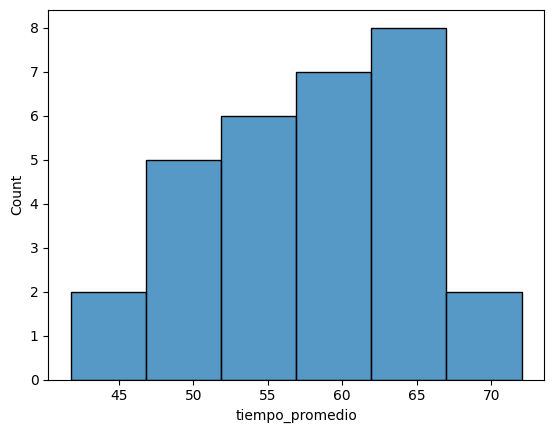

In [16]:
sns.histplot(x='tiempo_promedio', data= df_anova[df_anova['grupo']=='C'])#vemos que tiene cola, por eso hacemos levene

In [17]:
def calcular_levene(df,columna_grupos,columna_metrica): # lo mismo de abajo, pero de esta forma toma todos los valores
    unicos = df[columna_grupos].unique()
    for grupo in unicos:
        df_metrica = df[df[columna_grupos]== grupo][columna_metrica]
        globals()[grupo] = df_metrica
    print(stats.levene(*[globals()[var] for var in unicos]))
calcular_levene(df_anova,"grupo","tiempo_promedio") #homocedasticos

LeveneResult(statistic=0.5238437501575234, pvalue=0.5940958066342756)


In [18]:
stats.levene(df_anova[df_anova['grupo'] == 'C']['tiempo_promedio'], df_anova[df_anova['grupo'] == 'A']['tiempo_promedio'], df_anova[df_anova['grupo'] == 'B']['tiempo_promedio'])

LeveneResult(statistic=0.5238437501575234, pvalue=0.5940958066342756)

In [19]:
def calcular_anova(df,columna_grupos,columna_metrica): #volvemos a utilizar la funcion, pero esta vez para calcular ANOVA porque son 3 grupos
    unicos = df[columna_grupos].unique()
    for grupo in unicos:
        df_metrica = df[df[columna_grupos]== grupo][columna_metrica]
        globals()[grupo] = df_metrica
    print(stats.f_oneway(*[globals()[var] for var in unicos]))
calcular_anova(df_anova,"grupo","tiempo_promedio") #calculo parametrico

F_onewayResult(statistic=3.6200635854681185, pvalue=0.03089067703178718)


Menor que 0.05 por lo que los grupos sí son diferentes

In [20]:
df_res = df_anova.groupby('grupo')['tiempo_promedio'].mean().reset_index()

<Axes: xlabel='grupo', ylabel='tiempo_promedio'>

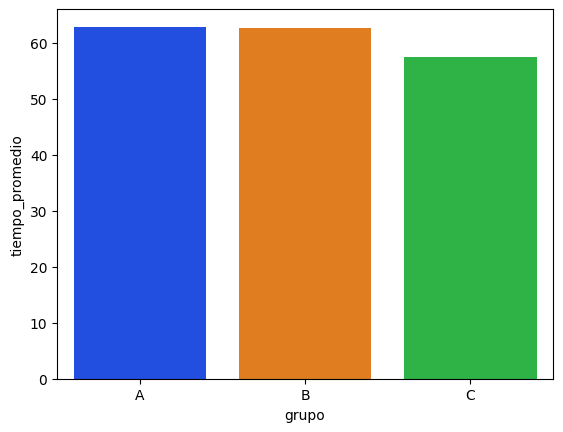

In [21]:
sns.barplot(x='grupo', y='tiempo_promedio', data= df_res, palette='bright') # puedo usar palette para colores o hue por la misma de grupos

ttest_rel es la dependiente
ttest_ind es la independiente